In [1]:
import pandas as pd
import pandas_ta as ta
import pandas_datareader.data as web
import numpy as np
import pickle
import itertools
from datetime import datetime
import backtrader as bt
import backtrader.indicators as btind

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [3]:
eur_usd = web.DataReader('EURUSD=X', data_source = 'yahoo')
eur_usd.columns = [column.lower().replace(' ', '_') for column in eur_usd.columns]
eur_usd

,high,low,open,close,volume,adj_close
Date,,,,,,
2015-08-23,1.170600,1.137294,1.137799,1.137695,0.0,1.137695
2015-08-24,1.159000,1.140030,1.158239,1.158306,0.0,1.158306
2015-08-25,1.155896,1.135500,1.155482,1.155095,0.0,1.155095
2015-08-26,1.136160,1.121160,1.133954,1.134005,0.0,1.134005
2015-08-27,1.131000,1.115670,1.124505,1.124796,0.0,1.124796
...,...,...,...,...,...,...
2020-08-16,1.188072,1.183040,1.185045,1.185255,0.0,1.185255
2020-08-17,1.196516,1.187536,1.187931,1.187648,0.0,1.187648
2020-08-18,1.195457,1.189343,1.194729,1.194786,0.0,1.194786


In [4]:
train_start = datetime(2016, 1, 1)
train_end = datetime(2017, 12, 31)

train = eur_usd.loc[train_start:train_end]
train

,high,low,open,close,volume,adj_close
Date,,,,,,
2016-01-01,1.086697,1.085906,1.085906,1.085906,0.0,1.085906
2016-01-04,1.094600,1.080600,1.085505,1.085399,0.0,1.085399
2016-01-05,1.084105,1.071201,1.082603,1.082755,0.0,1.082755
2016-01-06,1.077203,1.072200,1.075199,1.075199,0.0,1.075199
2016-01-07,1.087600,1.077400,1.077795,1.077900,0.0,1.077900
...,...,...,...,...,...,...
2017-12-25,1.188495,1.184904,1.185677,1.185607,0.0,1.185607
2017-12-26,1.187790,1.184750,1.187127,1.187254,0.0,1.187254
2017-12-27,1.191043,1.185565,1.186099,1.185789,0.0,1.185789


In [5]:
ema26 = ta.ema(train['close'], length = 26)
ema12 = ta.ema(train['close'], length = 12)

train['ema26'] = ema26
train['ema12'] = ema12

train['macd'] = ema12 - ema26
train['macd_signal_line'] = ta.ema(train['macd'], length = 9)
train

,high,low,open,close,volume,adj_close,ema26,ema12,macd,macd_signal_line
Date,,,,,,,,,,
2016-01-01,1.086697,1.085906,1.085906,1.085906,0.0,1.085906,NaN,NaN,NaN,NaN
2016-01-04,1.094600,1.080600,1.085505,1.085399,0.0,1.085399,NaN,NaN,NaN,NaN
2016-01-05,1.084105,1.071201,1.082603,1.082755,0.0,1.082755,NaN,NaN,NaN,NaN
2016-01-06,1.077203,1.072200,1.075199,1.075199,0.0,1.075199,NaN,NaN,NaN,NaN
2016-01-07,1.087600,1.077400,1.077795,1.077900,0.0,1.077900,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2017-12-25,1.188495,1.184904,1.185677,1.185607,0.0,1.185607,1.180573,1.182324,0.001750,0.001353
2017-12-26,1.187790,1.184750,1.187127,1.187254,0.0,1.187254,1.181068,1.183082,0.002014,0.001485
2017-12-27,1.191043,1.185565,1.186099,1.185789,0.0,1.185789,1.181418,1.183499,0.002081,0.001604


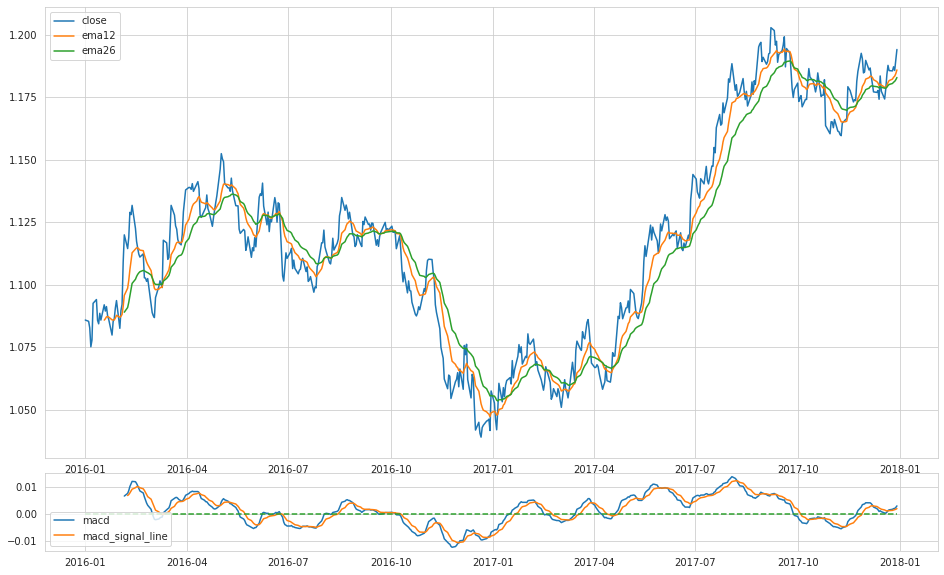

In [6]:
fig = plt.figure(figsize = (16, 10))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(train.index, train['close'])
ax1.plot(train.index, train['ema12'])
ax1.plot(train.index, train['ema26'])
ax1.legend(('close', 'ema12', 'ema26', ))
ax1.set_xticklabels(' ')

ax2.plot(train.index, train['macd'])
ax2.plot(train.index, train['macd_signal_line'])
ax2.plot(train.index, list(itertools.repeat(0, len(train.index))), linestyle = 'dashed')
ax2.legend(('macd', 'macd_signal_line', ), loc = 'lower left')

In [56]:
class macdCrossOver(bt.Strategy):
    """

    A simple moving average convergence divergence (NACD) crossover strategy; 
    crossing of a fast and slow moving average generates buy/sell
    signals.

    """
    params = (
        ('fast', 12),
        ('slow', 26)
    )
 
    # logging function
    def log(self, txt, dt = None):
        """
        inputs: text to log - txt
                datetime - df

        output: time of event in iso-format
                text indicating the event
        """

        dt = dt or self.data.datetime.date(0)
        print(f"{dt.isoformat()}, {txt}")


    def __init__(self):
        """
        Initialize the strategy
        """

        # throw error if fastema greater than slowema
        if self.params.fast > self.params.slow:
            raise ValueError(
                "A MACD strategy cannot have the fast moving average's window be " + \
                "greater than the slow moving average window.")

        # house keeping objects
        self.order = None
        self.buyprice = None
        self.buycomm = None   
 
        # strategy objects
        self.macd = None
 
        # get close price
        self.dataclose = self.data.close

        # get MACD as diff between fast(12 day) and slow EMA(26 day)
        # and the signal as 9 day EMA of macd
        self.macd = btind.MACD(self.dataclose, period_me1 = 12, period_me2 = 26, period_signal = 9)
        

        # Cross of macd.macd and macd.signal
        self.mcross = bt.indicators.CrossOver(self.macd.macd, self.macd.signal)
 
    # event notification and order tracking
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # do nothing
            pass
    
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f"BUY EXECUTED: {order.executed.price}, {order.executed.value}, {order.executed.comm}")
            elif order.issell():
                self.log(f"SELL EXECUTED: {order.executed.price}, {order.executed.value}, {order.executed.comm}")
            self.bar_executed = len(self)
        elif order.status in [order.Cancelled, order.Margin, order.Rejected]:
            self.log(f"Order Cancelled, Margin, Rejected")
            
        # Write down: no pending order
        self.order = None

    # execute on bar by bar basis
    def next(self):

        """
        Define what will be done in a single step, including creating and closing trades
        """

        # Simply log the closing price of the series from the reference
        self.log(f"Close, {self.dataclose[0]}")
    
        # if processing an order, do nothing, avoid duplicating orders
        if self.order:
            return

        # if not in position
        if not self.position:  # Are we out of the market?
            # Consider the possibility of entrance
            # Notice the indexing; [0] always mens the present bar, and [-1] the bar immediately preceding
            # Thus, the condition below translates to: "If today the MACD is bullish (greater than
            # signal_line), go long"
            # if our conditions are met
            if self.mcross[0] < 0:
                # buy
                self.log(f"BUY CREATE: {self.dataclose[0]}")

                # keep track of the order to avoid making another one
                self.order = self.buy()
        
        # if in position, we might consider selling
        else:
            if self.mcross[0] > 0:
                # sell
                self.log(f"SELL CREATE: {self.dataclose[0]}")

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

In [57]:
bt_start = datetime(2016, 1, 1)
bt_end = datetime(2017, 12, 31)

bt_data = eur_usd.loc[bt_start:bt_end]
bt_data

,high,low,open,close,volume,adj_close
Date,,,,,,
2016-01-01,1.086697,1.085906,1.085906,1.085906,0.0,1.085906
2016-01-04,1.094600,1.080600,1.085505,1.085399,0.0,1.085399
2016-01-05,1.084105,1.071201,1.082603,1.082755,0.0,1.082755
2016-01-06,1.077203,1.072200,1.075199,1.075199,0.0,1.075199
2016-01-07,1.087600,1.077400,1.077795,1.077900,0.0,1.077900
...,...,...,...,...,...,...
2017-12-25,1.188495,1.184904,1.185677,1.185607,0.0,1.185607
2017-12-26,1.187790,1.184750,1.187127,1.187254,0.0,1.187254
2017-12-27,1.191043,1.185565,1.186099,1.185789,0.0,1.185789


In [58]:
class PandasData(bt.feed.DataBase):
    params = (
        ('datetime', None),
        ('high', -1),
        ('low', -1),
        ('open', -1),
        ('close', -1),
        ('volume', -1),
        ('adj_close', None),
    )

In [59]:
cerebro = bt.Cerebro()

# add strategy
cerebro.addstrategy(macdCrossOver)

data = bt.feeds.PandasData(dataname = bt_data, fromdate = bt_start, todate = bt_end)
cerebro.adddata(data, name = 'EUR/USD')    # Give the data to cerebro

# Set our desired cash start
cerebro.broker.setcash(100000.0)
# 0.1% ... divide by 100 to remove the %
cerebro.broker.setcommission(commission = 0.001)

# Print out the starting conditions
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run over everything
cerebro.run()

# Print out the final result
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

96167
2016-06-20, Close, 1.1322976350784302
2016-06-21, Close, 1.1250618696212769
2016-06-22, Close, 1.1328235864639282
2016-06-23, Close, 1.1324002742767334
2016-06-26, Close, 1.103594422340393
2016-06-26, BUY CREATE: 1.103594422340393
2016-06-27, BUY EXECUTED: 1.1016006469726562, 1.1016006469726562, 0.0011016006469726563
2016-06-27, Close, 1.1015034914016724
2016-06-28, Close, 1.1073951721191406
2016-06-29, Close, 1.1128050088882446
2016-06-30, Close, 1.1106051206588745
2016-07-03, Close, 1.1131023168563843
2016-07-04, Close, 1.1146035194396973
2016-07-05, Close, 1.1065007448196411
2016-07-06, Close, 1.1099025011062622
2016-07-07, Close, 1.1065741777420044
2016-07-10, Close, 1.1043988466262817
2016-07-11, Close, 1.1058032512664795
2016-07-12, Close, 1.1062926054000854
2016-07-13, Close, 1.1094961166381836
2016-07-14, Close, 1.1106051206588745
2016-07-14, SELL CREATE: 1.1106051206588745
2016-07-17, SELL EXECUTED: 1.105534315109253, 1.1016006469726562, 0.001105534315109253
2016-07-17, 